# GET SOFR and EFFR Rate from NY Fed
Save to dataframe, plot EFFR and SOFR, and Diff

URL (eventCode: 520 is SOFR, 500 is EFFR)  
https://markets.newyorkfed.org/read?startDt=2022-01-03&endDt=2022-03-23&eventCodes=520&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx

In [63]:
import pandas as pd
from datetime import datetime, timedelta
from pandas.tseries.offsets import BDay
from bs4 import BeautifulSoup
import requests

In [64]:
tdy = datetime.today().date()
ydy = tdy - timedelta(days=1)
today = tdy.strftime('%Y-%m-%d')
yesterday = ydy.strftime('%Y-%m-%d')
sdate = '2021-01-01'

In [65]:
sofr_url = 'https://markets.newyorkfed.org/read?startDt='+sdate+'&endDt='+yesterday+'&eventCodes=520&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx'
ffr_sofr_url = 'https://markets.newyorkfed.org/read?startDt='+sdate+'&endDt='+yesterday+'&eventCodes=520,500&productCode=50&sort=postDt:-1,eventCode:1&format=xlsx'

In [66]:
# This is needed to supress the warning about using openpyxl
import warnings
warnings.simplefilter("ignore")

In [67]:
sofr_df = pd.read_excel(sofr_url, usecols='A:C', engine='openpyxl')
sofr_df['Effective Date'] = pd.to_datetime(sofr_df['Effective Date']).dt.strftime('%Y-%m-%d')
sofr_df = sofr_df.drop(columns=['Rate Type'])
#convert column names to lower case
sofr_df.columns = [i.lower() for i in sofr_df.columns]
sofr_df.set_index('effective date', inplace=True)
sofr_df.sort_index(ascending=True, inplace=True)

<AxesSubplot:title={'center':'SOFR Rates'}, xlabel='effective date'>

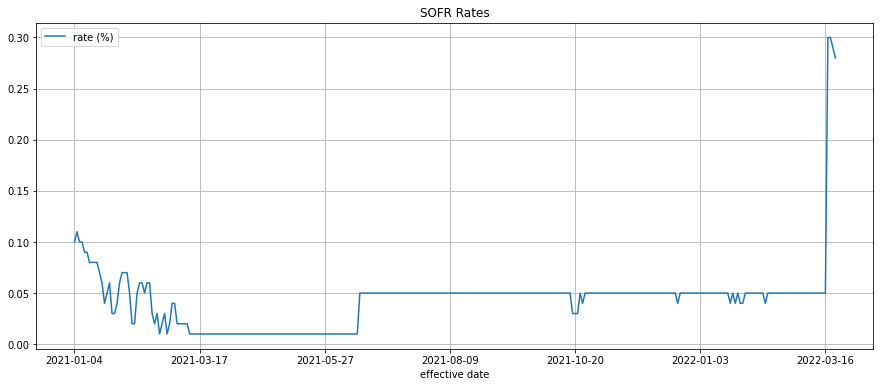

In [68]:
sofr_df.plot(grid=True, figsize=(15, 6), title='SOFR Rates')

In [69]:
ffr_sofr_df = pd.read_excel(ffr_sofr_url, usecols='A:C', engine='openpyxl')
ffr_sofr_df['Effective Date'] = pd.to_datetime(ffr_sofr_df['Effective Date']).dt.strftime('%Y-%m-%d')

In [70]:
ffr_sofr_df = ffr_sofr_df.pivot(index='Effective Date', values = 'Rate (%)',columns= 'Rate Type')
ffr_sofr_df.sort_index(ascending=True, inplace=True)

In [71]:
ffr_sofr_df['rate_diff'] = ffr_sofr_df['EFFR'] - ffr_sofr_df['SOFR']

<AxesSubplot:title={'center':'NY FED - SOFR vs. EFFR Rate'}, xlabel='Effective Date'>

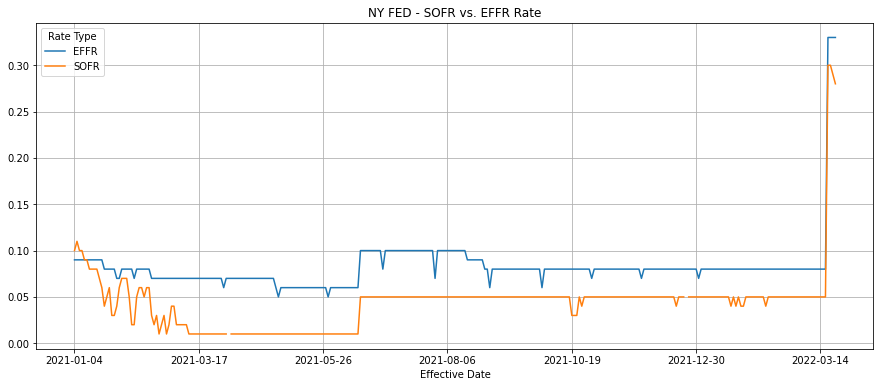

In [72]:
ffr_sofr_df[['EFFR','SOFR']].plot(grid=True, figsize=(15, 6), title='NY FED - SOFR vs. EFFR Rate')

<AxesSubplot:title={'center':'EFFR - SOFR Rate Diff'}, xlabel='Effective Date'>

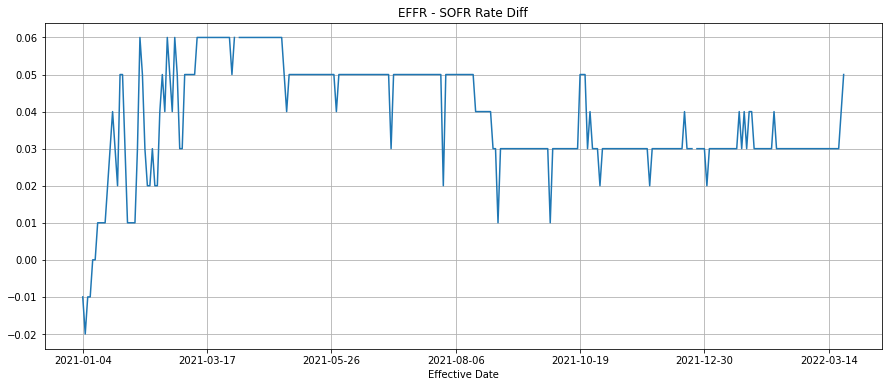

In [73]:
ffr_sofr_df['rate_diff'].plot(grid=True, figsize=(15, 6), title = 'EFFR - SOFR Rate Diff')